# 10-7 ROC 曲线

TPR = recall
$$TPR = \frac{TP}{TP + FN}$$


$$FPR = \frac{FP}{TN + FP}$$

他们的趋势是相一致的。

ROC_AUC 对于有偏的数据其实也不敏感。ROC_AUC 的意义在于比较两个模型孰优孰劣。

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [12]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

引入我们自己编写的 metrics 来计算各种指标。

In [15]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

ModuleNotFoundError: No module named 'playML'

In [16]:
plt.plot(fprs, tprs)
plt.show()

NameError: name 'fprs' is not defined

## scikit-learn 中的 ROC

从 scikit-learn 中直接得到 fprs 和 tprs 还有阈值的集合。

In [17]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

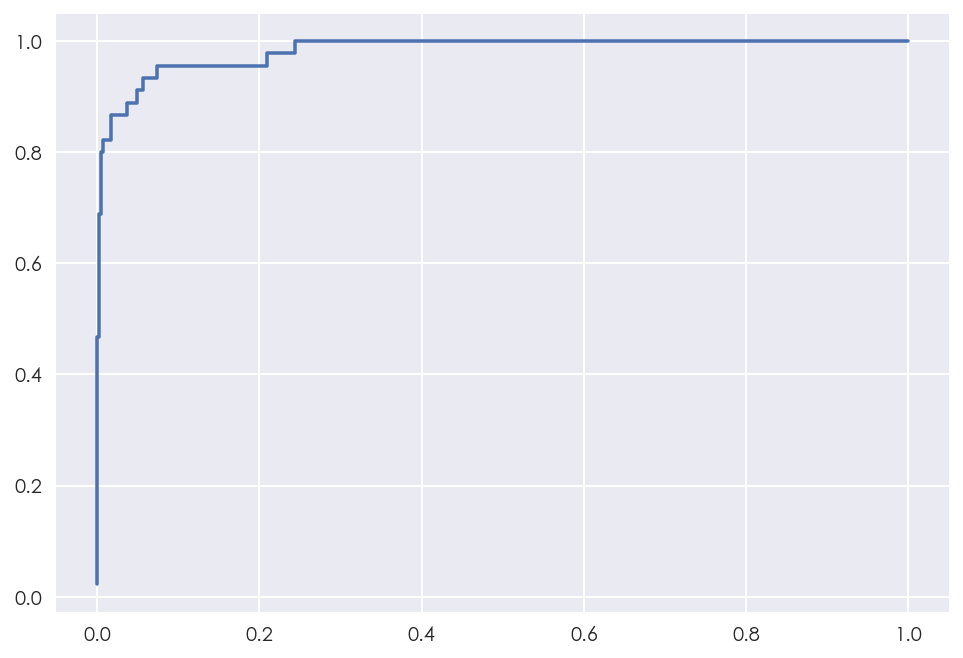

In [18]:
plt.plot(fprs, tprs)
plt.show()

## ROC AUC

这里 AUC 的意思是：area under curve（在曲线下方的面积）。

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

In [20]:
from sklearn.metrics import auc

auc(fprs, tprs)

0.9830452674897119

可见这个指标对于极偏的数据而言，并不敏感，我们有必要计算精准率和召回率。

ROC AUC 的应用场景在于比较两个模型孰优孰劣。